In [2]:
import mne
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, sosfiltfilt, sosfreqz

In [3]:
raw = mne.io.read_raw_gdf('sub_01.gdf')

Extracting EDF parameters from /Users/brianripley/Documents/GitHub/COGS-189-Project/sub_01.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
#  1, #  2, #  3, #  4, #  5, #  6, #  7, #  8, #  9, # 10, # 11, # 12, # 13, # 14, # 15, # 16, # 17, # 18, # 19, # 20, # 21, # 22, # 23, # 24, # 25, # 26, # 27, # 28, # 29, # 30, # 31, # 32, # 33, # 34, # 35, # 36, # 37, # 38, # 39, # 40, # 41, # 42, # 43, # 44, # 45, # 46, # 47, # 48, # 49, # 50, # 51, # 52, # 53, # 54, # 55, # 56, # 57, # 58, # 59, # 60
Creating raw.info structure...


In [12]:
raw

<RawGDF | sub_01.gdf, 3 x 986780 (3947.1 s), ~8 kB, data not loaded>

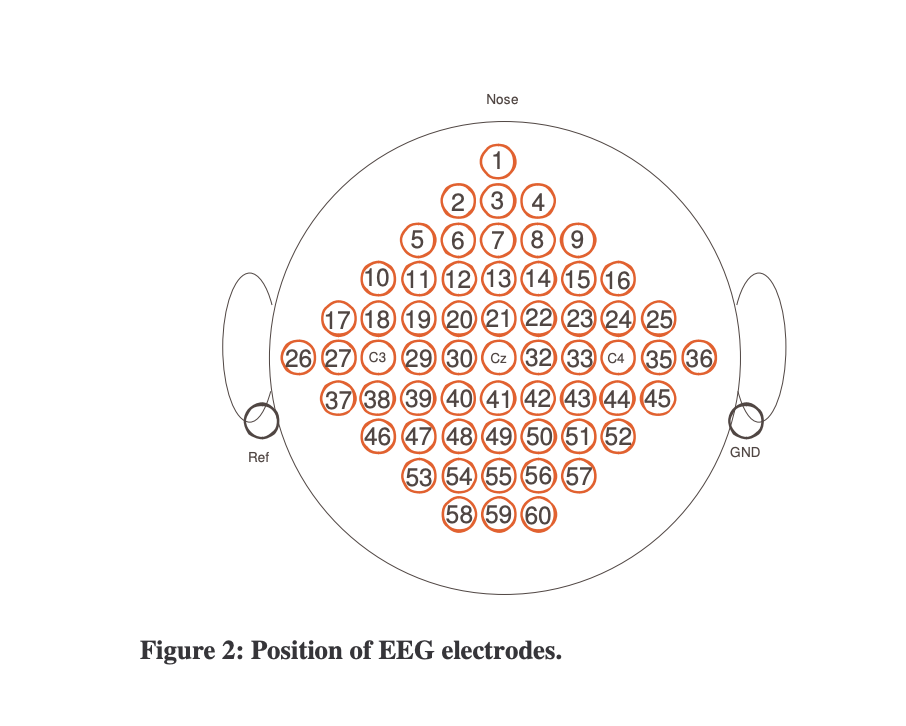

In [4]:
# Image from competition description- use in paper
from IPython import display
display.Image("electrode_positions.png")

In [5]:
motor_channels = raw.pick_channels(['# 28', '# 31', '# 34'])

In [6]:
# use mne filters
# Functions from A1
# Credit for these functions goes to 'WarrenWeckesser'
# https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

def butter_bandpass(lowcut, highcut, fs, order = 2):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog = False, btype = 'band', output = 'sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 2):
        sos = butter_bandpass(lowcut, highcut, fs, order = order)
        y = sosfiltfilt(sos, data)
        return y

In [7]:
# Try filter 8-30 Hz?
# Literature says this is desired frequency band for motor imagery

# Create filtering variables
fs = 250.0     # Stated in paper
lowcut = 8.0   # 8 Hz is the lowest frequency we will pass
highcut = 30.0 # 30  Hz is the highest frequency we will pass.

In [8]:
filtered = butter_bandpass_filter(motor_channels.get_data(), lowcut, highcut, fs, order = 3)

In [9]:
filtered

array([[ 2.56069017e-07,  2.90252988e-06,  3.34483667e-06, ...,
         5.06518501e-06,  1.30718340e-06, -3.36510673e-06],
       [ 4.37868881e-07,  3.45946887e-06,  5.16244614e-06, ...,
         5.76515381e-06,  2.34108825e-06, -1.31382673e-06],
       [ 2.89059251e-07,  1.80334098e-06,  2.55832294e-06, ...,
         5.10974899e-06,  1.88706774e-06, -1.50853471e-06]])

Not sure if this filtering is needed, or whether it will help at all. But can change filter variables or delete if needed. Now will try to epoch the data- split into the four different target classes.

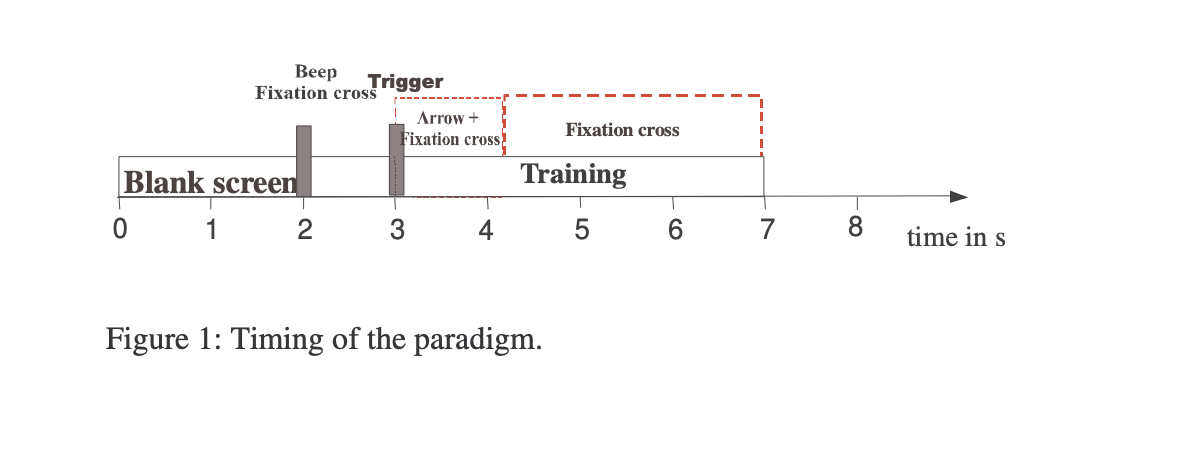

In [10]:
# Image from competition description- use in paper
from IPython import display
display.Image("paradigm_timing.png")

We have the length of each even, but need to figure out what these labels represent:

Left row is time, right row is an event

Events were looking for: queue for events - right hand, left hand, foot, tongue

In [14]:
raw # raw gdf, need raw annotations

<RawGDF | sub_01.gdf, 3 x 986780 (3947.1 s), ~8 kB, data not loaded>

In [16]:
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: ['1023', '768', '769', '770', '771', '772', '783', '785', '786']


(array([[  2424,      0,      2],
        [  2924,      0,      8],
        [  2924,      0,      9],
        ...,
        [980342,      0,      8],
        [980342,      0,      9],
        [980592,      0,      7]]),
 {'1023': 1,
  '768': 2,
  '769': 3,
  '770': 4,
  '771': 5,
  '772': 6,
  '783': 7,
  '785': 8,
  '786': 9})

In [111]:
mne.events_from_annotations(motor_channels)[1]

Used Annotations descriptions: ['1023', '768', '769', '770', '771', '772', '783', '785', '786']


{'1023': 1,
 '768': 2,
 '769': 3,
 '770': 4,
 '771': 5,
 '772': 6,
 '783': 7,
 '785': 8,
 '786': 9}

In [113]:
counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for event in events:
    counts[event[2]] = counts[event[2]] + 1

In [114]:
counts

{1: 62, 2: 360, 3: 45, 4: 45, 5: 45, 6: 45, 7: 180, 8: 360, 9: 360}

We have four classes- so I guess 3, 4, 5, 6 are indicators of our classes..
makes sense (?) cause document says that each experiment consisted of several runs with at least 40 trials each

In [ ]:
# Must be some other way to extract events, not raw eeg 

In [ ]:
# EEG Lab- should load in matlab
# Biosig viewer

# 

Need to adjust this to work for our data:
split into four motor imagery classes, split each of those into train and test

In [ ]:
# Epoch data from the assignment, need to adjust

# Create empty lists to store our data. We'll conver them into np.arrays at the end
train_data = []
train_labels = []
train_markers = []
test_data = []
test_markers = []

# Load all data in (concatenate train data, keep test separate)
pfx = 'AAS0'
dir_ = './data/'
train = [10, 11]
S = [10, 11, 12]
R = [x for x in range(1, 9)]
for s in S:
    for r in R:
        fp = Path(dir_ + pfx + '%dR0%d.mat' % (s, r))
        if fp.exists() and fp.is_file():
            # If file exists, load, process, append
            print('Processing: ' + str(fp))
            x = loadmat(fp)

            # All we need are the EEG data (signal) and markers (StimulusCode) out of this
            data_   = np.array(x['signal'])        # dim (num(time_points) x num(channels))
            mrks_   = x['StimulusCode'].flatten(); # dim (num(time_points) x 1)

            # Create a stimulus onset array
            onsets = np.zeros_like(mrks_)
            for i in range(mrks_.shape[0]):
                # Roughly equivalent to positive first derivative, but easier to read
                if mrks_[i] != 0 and mrks_[i-1] == 0:
                    onsets[i] = 1
                    
            # Determine all indices where onsets occur
            onsets_ix = np.where(onsets == 1)[0]
        
            # Iterate through onsets, epoch, filter, append
            for i in range(len(onsets_ix)):
                t0 = onsets_ix[i]
                
                # Epoch and correct DC offset of signal
                data = data_[e_s+t0:t0+e_e, :] - np.mean(data_[e_s+t0:t0+e_e, :], 0)
                
                # Filter the epoch
                data = sosfiltfilt(sos, data)
                
                # Now let's baseline correct
                data = data - np.mean(data[bl_s+np.abs(e_s):np.abs(e_s)+bl_e, :], 0)
                
                # Append data to correct locations
                if s in train:
                    train_data.append(data)
                    train_markers.append(mrks_[t0])
                    train_labels.append(x['StimulusType'].flatten()[t0]) # target or non-target
                else:
                    test_data.append(data)
                    test_markers.append(mrks_[t0])
                    
print('Processing completed!')

# Convert all of our lists into numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_markers = np.array(train_markers)
test_data = np.array(test_data)
test_markers = np.array(test_markers)